# Impact of News Sentiment on Stocks

### 1. News Sentiment Analysis
### 2. Stock Analysis
### 3. Sentiment and Stock Plotting

## 1. News Sentiment Analysis

Chose SPY
Top 3 weighted companies:

AAPL, MSFT, AMZN

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from urllib.request import urlopen
from urllib.request import Request
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
# nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

%matplotlib inline
import yfinance as yf
# from statsmodels.tsa.arima.model import ARIMA


In [2]:
# params
n=3 # number of headlines displayed per ticker
tickers=['AAPL','MSFT','AMZN']

In [3]:
# Get Data
finwiz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}

In [4]:
for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    resp = urlopen(req)    
    html = BeautifulSoup(resp, features="lxml")
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [5]:
try:
    for ticker in tickers:
        df = news_tables[ticker]
        df_tr = df.findAll('tr')
    
        print ('\n')
        print ('Recent News Headlines for {}: '.format(ticker))
        
        for i, table_row in enumerate(df_tr):
            a_text = table_row.a.text
            td_text = table_row.td.text
            td_text = td_text.strip()
            print(a_text,'(',td_text,')')
            if i == n-1:
                break
except KeyError:
    pass



Recent News Headlines for AAPL: 
Dow Jones Futures: Stock Market Rally Takes Trump's Stimulus Deal Veto Threat In Stride; AMD, Apple Chipmakers Near Buy Points ( Dec-23-20 05:49PM )
Biggest risks facing tech in 2021 ( 05:20PM )
Dow Jones Stocks To Buy And Watch In December 2020: Apple Approaches New Buy Point ( 04:55PM )


Recent News Headlines for MSFT: 
Cyberpunk 2077s Opening Sales Were Below Expectations. What It Means for CD Projekt Stock. ( Dec-23-20 04:59PM )
Dow Jones Fades As Nasdaq Reverses Lower; These Stocks Trade In Buy Zones ( 04:21PM )
15 Biggest Software Companies in the World ( 02:37PM )


Recent News Headlines for AMZN: 
After Incredible December Gains, Traders Cashed Out of Bitcoin Mining Stocks Today ( Dec-23-20 05:44PM )
Biggest risks facing tech in 2021 ( 05:20PM )
The Zacks Analyst Blog Highlights: AMZN, WMT, UNH, MS and GSK ( 02:39PM )


In [6]:
# Iterate through the news
parsed_news = []
for file_name, news_table in news_tables.items():
    for x in news_table.findAll('tr'):
        text = x.a.get_text() 
        date_scrape = x.td.text.split()

        if len(date_scrape) == 1:
            time = date_scrape[0]
            
        else:
            date = date_scrape[0]
            time = date_scrape[1]

        ticker = file_name.split('_')[0]
        
        parsed_news.append([ticker, date, time, text])

In [7]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()

columns = ['Ticker', 'Date', 'Time', 'Headline']
news = pd.DataFrame(parsed_news, columns=columns)
scores = news['Headline'].apply(analyzer.polarity_scores).tolist()

df_scores = pd.DataFrame(scores)
news = news.join(df_scores, rsuffix='_right')

In [8]:
news.head()

,Ticker,Date,Time,Headline,neg,neu,pos,compound
0,AAPL,Dec-23-20,05:49PM,Dow Jones Futures: Stock Market Rally Takes Tr...,0.152,0.848,0.0,-0.5267
1,AAPL,Dec-23-20,05:20PM,Biggest risks facing tech in 2021,0.296,0.704,0.0,-0.2732
2,AAPL,Dec-23-20,04:55PM,Dow Jones Stocks To Buy And Watch In December ...,0.000,1.000,0.0,0.0000
3,AAPL,Dec-23-20,04:09PM,Tesla Stock Now Faces Its Most Serious Potenti...,0.397,0.603,0.0,-0.6436
4,AAPL,Dec-23-20,03:31PM,Apple Car would take the tech giant to the nex...,0.000,1.000,0.0,0.0000


In [9]:
news.to_csv('hl_12_23.csv')

In [10]:
# View Data 
news['Date'] = pd.to_datetime(news.Date).dt.date

unique_ticker = news['Ticker'].unique().tolist()
news_dict = {name: news.loc[news['Ticker'] == name] for name in unique_ticker}


In [11]:
values = []
for ticker in tickers: 
    dataframe = news_dict[ticker]
    dataframe = dataframe.set_index('Ticker')
    dataframe = dataframe.drop(columns = ['Headline'])
    print ('\n')
    print (dataframe.head())
    
    mean = round(dataframe['compound'].mean(), 2)
    values.append(mean)



              Date     Time    neg    neu  pos  compound
Ticker                                                  
AAPL    2020-12-23  05:49PM  0.152  0.848  0.0   -0.5267
AAPL    2020-12-23  05:20PM  0.296  0.704  0.0   -0.2732
AAPL    2020-12-23  04:55PM  0.000  1.000  0.0    0.0000
AAPL    2020-12-23  04:09PM  0.397  0.603  0.0   -0.6436
AAPL    2020-12-23  03:31PM  0.000  1.000  0.0    0.0000


              Date     Time    neg    neu  pos  compound
Ticker                                                  
MSFT    2020-12-23  04:59PM  0.000  1.000  0.0     0.000
MSFT    2020-12-23  04:21PM  0.155  0.845  0.0    -0.296
MSFT    2020-12-23  02:37PM  0.000  1.000  0.0     0.000
MSFT    2020-12-23  02:14PM  0.000  1.000  0.0     0.000
MSFT    2020-12-23  12:56PM  0.000  1.000  0.0     0.000


              Date     Time    neg    neu    pos  compound
Ticker                                                    
AMZN    2020-12-23  05:44PM  0.000  0.821  0.179    0.3400
AMZN    2020-12-23 

In [12]:
df = pd.DataFrame(list(zip(tickers, values)), columns =['Ticker', 'Mean Sentiment']) 
df = df.set_index('Ticker')
df = df.sort_values('Mean Sentiment', ascending=False)
# print ('\n')
df.head()

,Mean Sentiment
Ticker,
AMZN,0.17
AAPL,0.05
MSFT,0.04


In [13]:
# New words and values
new_words = {
    'crushes': 10,
    'beats': 5,
    'misses': -5,
    'trouble': -10,
    'falls': -100,
}
# Instantiate the sentiment intensity analyzer with the existing lexicon
vader = SentimentIntensityAnalyzer()
# Update the lexicon
vader.lexicon.update(new_words)

print('ok!')

ok!


<p>Now that we have the data and the algorithm loaded, we will get to the core of the matter: programmatically predicting sentiment out of news headlines! Luckily for us, VADER is very high level so, in this case, we will not adjust the model further<sup>*</sup> other than the lexicon additions from before.</p>
<p><sup>*</sup>VADER "out-of-the-box" with some extra lexicon would likely translate into <strong>heavy losses</strong> with real money. A real sentiment analysis tool with chances of being profitable will require a very extensive and dedicated to finance news lexicon. Furthermore, it might also not be enough using a pre-packaged model like VADER.</p>

<AxesSubplot:xlabel='Date'>

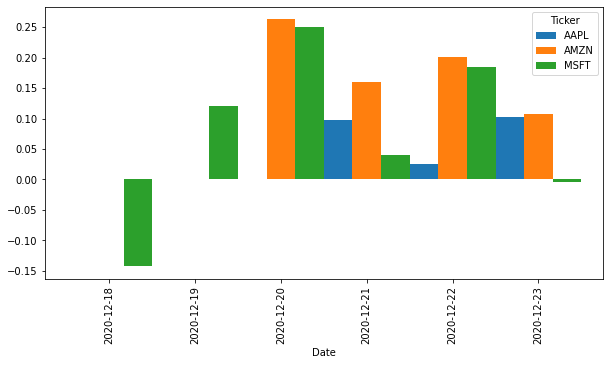

In [14]:
# Group by date and ticker columns from scored_news and calculate the mean
mean_c = news.groupby(['Date', 'Ticker']).mean()

# Unstack the column ticker
mean_c = mean_c.unstack('Ticker')

# Get the cross-section of compound in the 'columns' axis
mean_c = mean_c.xs('compound', axis='columns')
# Plot a bar chart with pandas

mean_c.plot(kind='bar', figsize=(10,5), width=1)

<p>What happened to AMZN on Dec 21st? Since we happen to have the headlines inside our <code>DataFrame</code>, a quick peek reveals that there are a few problems with that particular day: </p>
<ul>
<li>There are only 5 headlines for that day.</li>
<li>Two headlines are verbatim the same as another but from another news outlet.</li>
</ul>
<p>Let's clean up the dataset a bit, but not too much! While some headlines are the same news piece from different sources, the fact that they are written differently could provide different perspectives on the same story. Plus, when one piece of news is more important, it tends to get more headlines from multiple sources. What we want to get rid of is verbatim copied headlines, as these are very likely coming from the same journalist and are just being "forwarded" around, so to speak.</p>

In [15]:
# Count the number of headlines in scored_news (store as integer)
num_news_before = news['Headline'].count()

# Drop duplicates based on ticker and headline
scored_news_clean = news.drop_duplicates(subset=['Ticker','Headline'])
                      
# Count number of headlines after dropping duplicates
num_news_after = scored_news_clean['Headline'].count()
                                                        
# Print before and after numbers to get an idea of how we did 
print(f"Before we had {num_news_before} headlines, now we have {num_news_after}")

Before we had 300 headlines, now we have 298


### Sentiment on a single trading day with a single stock

In [54]:
# Set the index to ticker and date
single_day = scored_news_clean.set_index(['Ticker', 'Date'])
# Cross-section the fb row
single_day = single_day.xs('AMZN')

# Select the 3rd of January of 2019
single_day = single_day['2020-12-22']

# Convert the datetime string to just the time
single_day['Time'] = pd.to_datetime(single_day['Time']).dt.time

# Set the index to time and 
single_day = single_day.set_index('Time')

# Sort it
single_day = single_day.sort_index()

In [55]:
# single_day.info()
single_day.head()
# single_day.index

,Headline,neg,neu,pos,compound
Time,,,,,
03:53:00,Startups Target Small Merchants On Amazon's Pl...,0.000,1.000,0.000,0.0000
05:49:00,Markets are moving away from a 'Darwinistic' p...,0.000,1.000,0.000,0.0000
06:06:00,5 Brand-Name Stocks That Can Still Make You a ...,0.000,1.000,0.000,0.0000
06:15:00,These 10 clunkers are my worst calls from a de...,0.241,0.647,0.112,-0.4939
06:26:00,Google Helps Birth Two Social Media Unicorns i...,0.000,0.645,0.355,0.5267


In [56]:
def plot_sent(data,colrs,gph_title): 
    # Drop the columns that aren't useful for the plot
    plot_data = data.drop(['Headline', 'compound'], axis=1)

    # Change the column names to 'negative', 'positive', and 'neutral'
    plot_data.columns = ['negative', 'positive', 'neutral']

    # Plot a stacked bar chart
    plot_data.plot(kind='bar', title=gph_title, color=colrs,width=1)

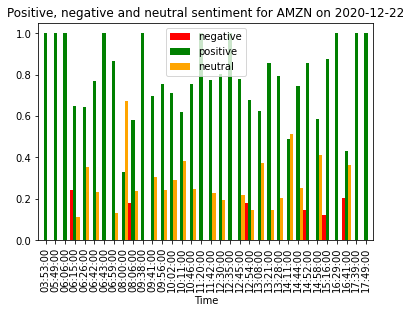

In [57]:
TITLE = "Positive, negative and neutral sentiment for AMZN on 2020-12-22"
COLORS = ["red", "green", "orange"]
plot_sent(single_day,COLORS,TITLE)

## 2. Stock Analysis

Going to use yfinance

In [58]:
amzn = yf.Ticker('AMZN')

In [59]:
# lets see what we're working with
# amzn.info

In [60]:
adf = amzn.history(period='1d',interval='1m')
adf.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2020-12-23 09:30:00-05:00,3205.000000,3205.500000,3201.010010,3203.004883,60569,0,0
2020-12-23 09:31:00-05:00,3199.524902,3200.000000,3198.000000,3198.193115,10686,0,0
2020-12-23 09:32:00-05:00,3198.010010,3198.399902,3195.000000,3198.399902,12893,0,0
2020-12-23 09:33:00-05:00,3197.199951,3197.699951,3197.199951,3197.199951,10093,0,0
2020-12-23 09:34:00-05:00,3195.000000,3195.000000,3192.000000,3193.649902,20720,0,0


In [61]:
# using lows
adf = adf[['Low']]
adf.head()

,Low
Datetime,
2020-12-23 09:30:00-05:00,3201.010010
2020-12-23 09:31:00-05:00,3198.000000
2020-12-23 09:32:00-05:00,3195.000000
2020-12-23 09:33:00-05:00,3197.199951
2020-12-23 09:34:00-05:00,3192.000000


Since we’re going to use the data just for the last day, let’s reindex the dataframe to remove the date and timezone components and keep just the time one:

In [62]:
# setting the date
adf['date'] = pd.to_datetime(adf.index).time
# replace the index
adf.set_index('date',inplace=True)

In [63]:
adf.head()

,Low
date,
09:30:00,3201.010010
09:31:00,3198.000000
09:32:00,3195.000000
09:33:00,3197.199951
09:34:00,3192.000000


In [64]:
# get length of df to see how we can plot it
len(adf)

382

In [65]:
# every 5th row, meaning every 5 minutes
graph_adf=adf.iloc[::5, :]
graph_adf.head()

,Low
date,
09:30:00,3201.010010
09:35:00,3194.000000
09:40:00,3192.139893
09:45:00,3188.600098
09:50:00,3193.243896


<AxesSubplot:title={'center':'stock movement for AMZN on 2020-12-22'}, xlabel='date'>

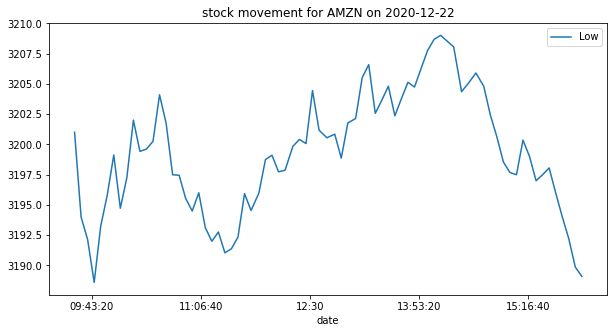

In [66]:
TITLE2 = "stock movement for AMZN on 2020-12-22"
# ax = plot_day.plot(kind='bar', title=TITLE, color=COLORS, figsize=(10,5), width=1)
graph_adf.plot(title=TITLE2,figsize=(10,5))

# ax = df1.plot()
# df2.plot(ax=ax)

## 3. Sentiment and Stock Plotting

Text(0, 0.5, 'Stock Movement')

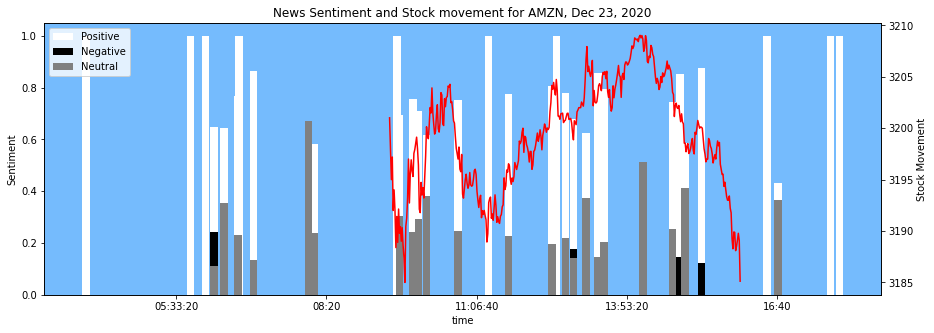

In [73]:
pd.plotting.register_matplotlib_converters()
fig, ax1=plt.subplots(figsize=(15,5))
ax2 = ax1.twinx() # set up 2nd axis
#plot line graph first, that's axis one

plot_data = single_day.drop(['Headline', 'compound'], axis=1)
# Change the column names to 'negative', 'positive', and 'neutral'
plot_data.columns = ['negative', 'positive', 'neutral']
# Plot a stacked bar chart
wh=500 #width
# shift = pd.to_timedelta('1S')
ax1.set_facecolor('xkcd:sky blue')
pos = ax1.bar(plot_data.index,plot_data['positive'],wh,color='white')
neg = ax1.bar(plot_data.index,plot_data['negative'],wh,color='black')
neu = ax1.bar(plot_data.index,plot_data['neutral'],wh,color='gray')
ax1.legend( (pos, neg, neu), ('Positive', 'Negative', 'Neutral') )
# ax1.legend()
# ax2.bar(plot_data.index,plot_data.negative,color=COLORS)
ax2.plot(adf,color='red')
ax1.set_title('News Sentiment and Stock movement for AMZN, Dec 23, 2020')
ax1.set_ylabel('Sentiment')
ax2.set_ylabel('Stock Movement')
# plt.legend()